In [85]:
import pennylane as qml
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

All possible 3-qubit graph states

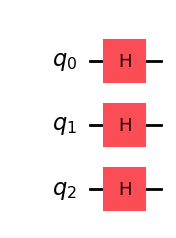

<IPython.core.display.Latex object>

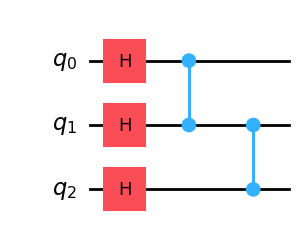

<IPython.core.display.Latex object>

In [ ]:
graph_states_3 = {
    'separable': [],
    'linear': [(0, 1), (1, 2)],
    'single EPR pair': [(0, 1)],
    'star': [(0, 1), (0, 2), (1, 2)]
}

def compute_statevectors(edges):
    graph_state_circuit = QuantumCircuit(3)

    for i in range(3):
        graph_state_circuit.h(i)
    
    for i, j in edges:
        graph_state_circuit.cz(i, j)
    
    state = Statevector.from_instruction(graph_state_circuit)
    
    return graph_state_circuit, state

def plot_graph_states(graphs):
    fig, axes = plt.subplots(2, 2, figsize=(7, 5))
    axes = axes.flatten()

    for ax, (title, edges) in zip(axes, graphs.items()):
        circuit, state = compute_statevectors(edges)

        display(circuit.draw('mpl'))
        display(state.draw('latex'))    

        G = nx.Graph()

        G.add_nodes_from([0, 1, 2])
        G.add_edges_from(edges)
        
        pos = {
            0: (0, 0),
            1: (.8, .5),
            2: (1.2, 0)
        }
        nx.draw(G, pos, with_labels=True, node_size=200, ax=ax)
        
        ax.set_title(f"{title}\nState:")


    plt.tight_layout()
    plt.show()

plot_graph_states(graph_states_3)

In [ ]:
# import julia

# j = julia.Julia()
# j.include("main.jl")

# res = j.add(2, 3)
# res
# from julia import Main

# result = Main.add(1, 2)
# result